In [1]:
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
from sklearn.datasets import fetch_california_housing

from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree

# This is Nurgul Kozhakhmetova

### Exercise 1: Feature Selection with SelectKBest


In [3]:
iris = load_iris()
X = iris.data
y = iris.target

selector = SelectKBest(score_func=chi2, k=2)
X_new = selector.fit_transform(X, y)

mask = selector.get_support()
selected_features = [iris.feature_names[i] for i in range(len(mask)) if mask[i]]
print("Selected features:", selected_features)

Selected features: ['petal length (cm)', 'petal width (cm)']


### Exercise 2: Feature Importance with Random Forest


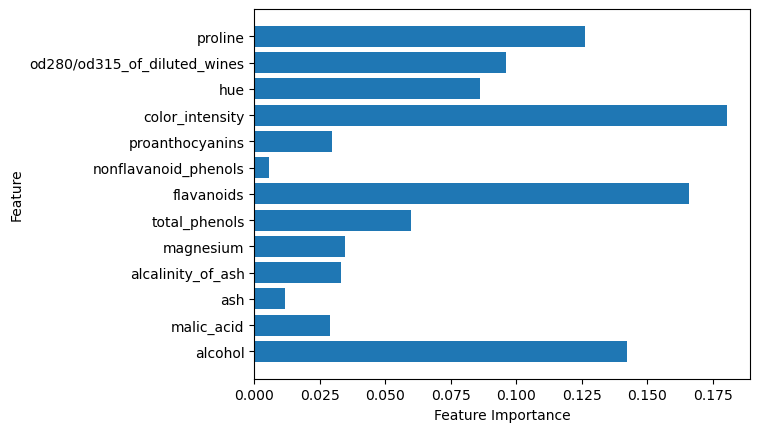

In [5]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

plt.barh(wine.feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

### Exercise 3: Recursive Feature Elimination (RFE)

In [7]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=10)
rfe.fit(X_train, y_train)

y_pred = rfe.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9298245614035088


# This is Nurgul Kozhakhmetova

### Exercise 4: L1 Regularization for Feature Selection


In [8]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3, random_state=42)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 2775.1650761834444


# Classification Exercises
### Exercise 1: Logistic Regression


In [9]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


### Exercise 2: Support Vector Machine (SVM)


In [57]:
from sklearn.inspection import DecisionBoundaryDisplay
cancer = load_breast_cancer()

X = cancer.data[:, :2]
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

# svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
svm = SVC()
svm.fit(X_train, y_train)

# DecisionBoundaryDisplay.from_estimator(
#     svm, 
#     X,
#     response_method="predict",
#     cmap=plt.cm.Spectral,
#     alpha=0.8,
#     xlabel=cancer.feature_names[0],
#     ylabel=cancer.feature_names[1],
# )
# plt.scatter(X[:, 0], X[:, 1],
#            c=y, 
#            s=20, edgecolors="k")
# plt.show()

y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.935672514619883
Confusion Matrix:
 [[ 52  11]
 [  0 108]]


### Exercise 3: Decision Tree Classifier


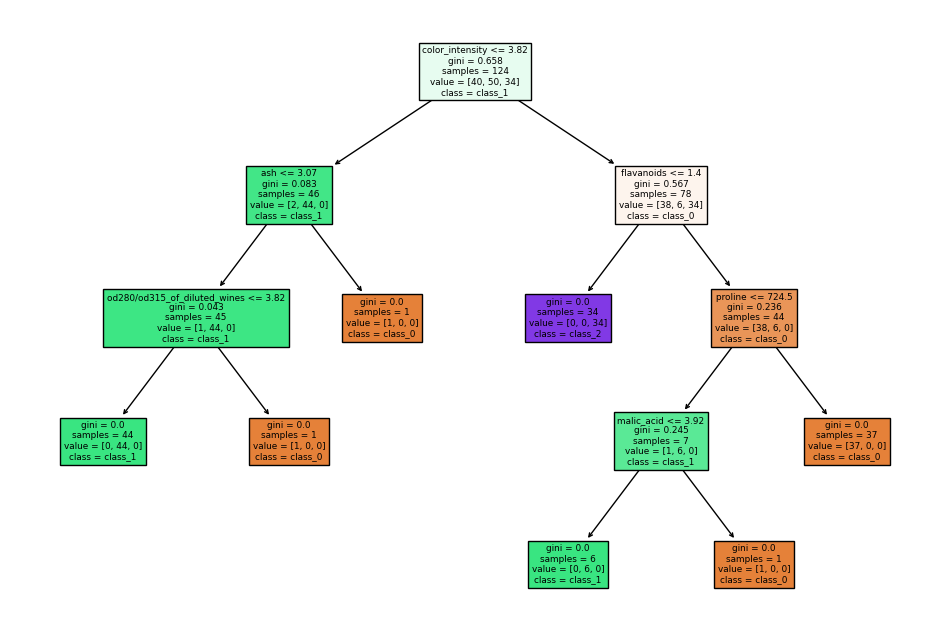

In [15]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

plt.figure(figsize=(12,8))
plot_tree(dt, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.show()

# Regression Exercises
### Exercise 1: Linear Regression


In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 0.5305677824766756
R-squared: 0.5957702326061661


### Exercise 2: Ridge Regression


In [19]:
from sklearn.linear_model import Ridge

diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Mean Squared Error: 3112.9664151980814
R-squared: 0.4233440269603015


### Exercise 3: Decision Tree Regression


Mean Squared Error: 0.5286552805630007


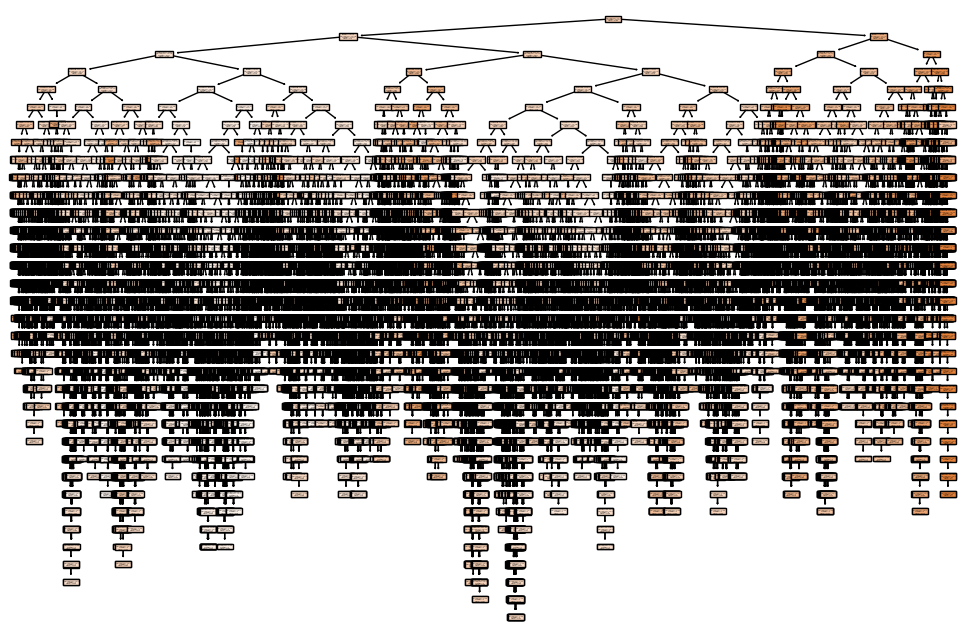

In [61]:
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.3, random_state=42)

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

y_pred = dt_reg.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

plt.figure(figsize=(12,8))
plot_tree(dt_reg, feature_names=housing.feature_names, filled=True)
plt.show()

# wine = load_wine()
# X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

# dt = DecisionTreeClassifier()
# dt.fit(X_train, y_train)

# plt.figure(figsize=(12,8))
# plot_tree(dt, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
# plt.show()

Mean Squared Error: 0.6325363214073455


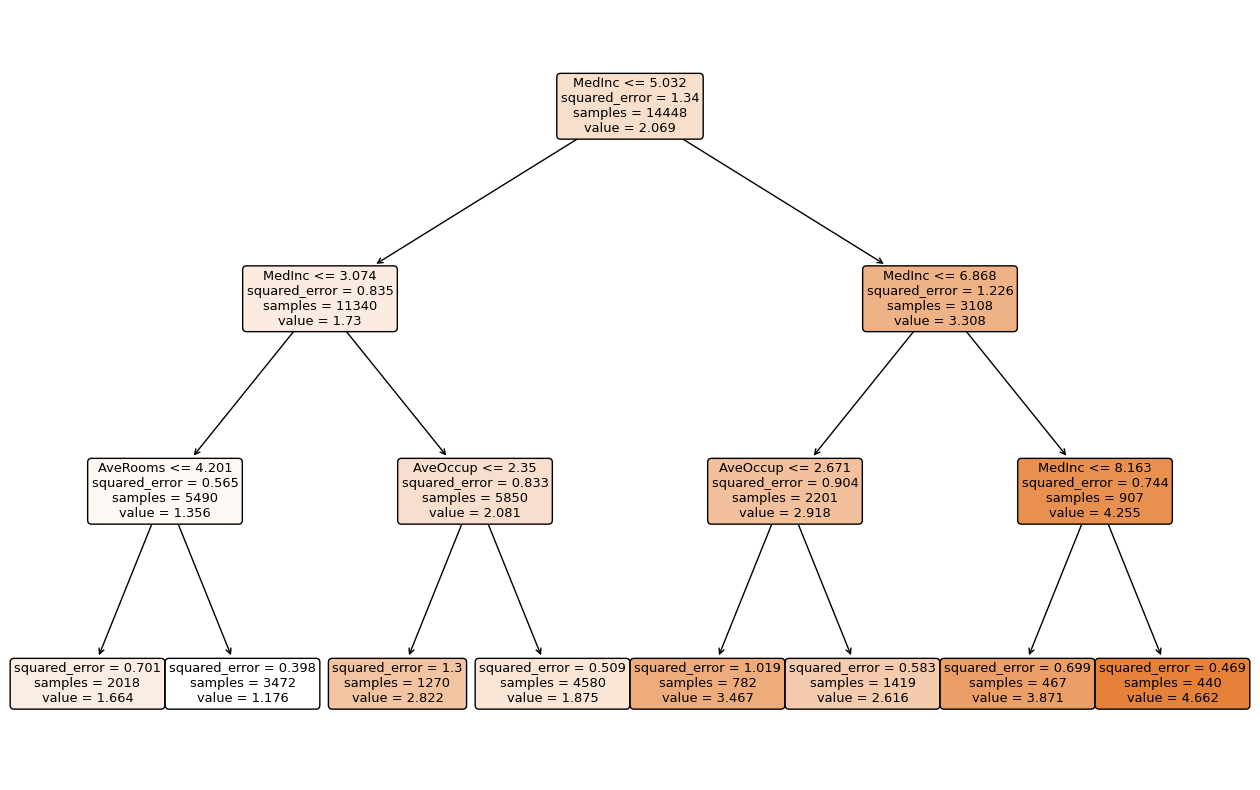

In [65]:
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.3, random_state=42)

dt_reg = DecisionTreeRegressor(max_depth=3) 
dt_reg.fit(X_train, y_train)

y_pred = dt_reg.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

plt.figure(figsize=(16, 10))
plot_tree(dt_reg, feature_names=housing.feature_names, filled=True, rounded=True)
plt.show()